# 分类任务

简而言之，分类任务就是将一个物体划分到规定的若干类别中。


## 分类神经网络的结构

输入层 -> 隐藏层(激活函数) -> 输出层(激活函数) with loss func and optimizer


## 数据生成

使用sklearn中的circles函数生成模拟数据点。

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03, # 为数据点添加噪声，模拟真实情况
                    random_state=42)
print(f'First 5 X features:\n{X[:5]}')
print(f'\nFirst 5 y labels :\n{y[:5]}')

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels :
[1 1 1 1 0]


In [2]:
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0],
                        'X2':X[:,1],
                        'label':y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


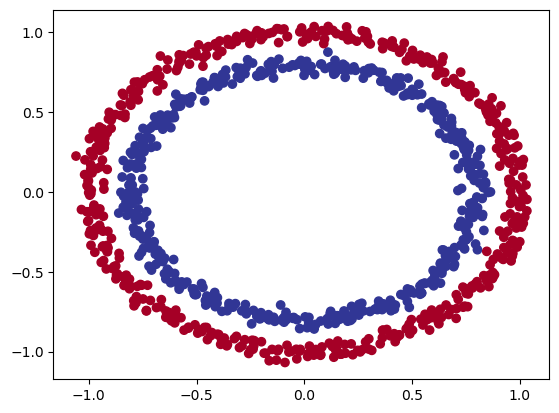

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [4]:
import torch

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 train_size=0.8,
                                                 random_state=42)
len(X_train),len(y_train)

(800, 800)

## 构建模型

In [13]:
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available else 'cpu'

class BinaryClassfication(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,5)
        self.layer2 = nn.Linear(5,1)
    
    def forward(self,x):
        return self.layer2(self.layer1(x))
    
model_0 = BinaryClassfication().to(device)


loss_fn = nn.BCEWithLogitsLoss()
op = torch.optim.Adam(model_0.parameters(),
                      lr=0.05)



In [4]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    return (correct / len(y_true)) * 100


## 训练模型


In [14]:
epochs = 100
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_pred=y_pred,y_true=y_train)

    op.zero_grad()

    loss.backward()

    op.step()

    model_0.eval()

    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test,test_pred)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Train Loss: {loss.item()} | Train Acc: {acc} | Test Loss: {test_loss.item()} | Test Acc: {test_acc}')

Epoch: 0 | Train Loss: 0.6970718502998352 | Train Acc: 49.375 | Test Loss: 0.6951444745063782 | Test Acc: 54.0
Epoch: 10 | Train Loss: 0.6931515336036682 | Train Acc: 48.5 | Test Loss: 0.6938784718513489 | Test Acc: 40.0
Epoch: 20 | Train Loss: 0.6930389404296875 | Train Acc: 50.5 | Test Loss: 0.6955168843269348 | Test Acc: 48.0
Epoch: 30 | Train Loss: 0.6929946541786194 | Train Acc: 51.125 | Test Loss: 0.6941596865653992 | Test Acc: 47.0
Epoch: 40 | Train Loss: 0.6929847598075867 | Train Acc: 51.87500000000001 | Test Loss: 0.6948769092559814 | Test Acc: 46.0
Epoch: 50 | Train Loss: 0.6929820775985718 | Train Acc: 51.125 | Test Loss: 0.6946128606796265 | Test Acc: 46.5
Epoch: 60 | Train Loss: 0.6929800510406494 | Train Acc: 51.24999999999999 | Test Loss: 0.6947093605995178 | Test Acc: 46.0
Epoch: 70 | Train Loss: 0.6929800510406494 | Train Acc: 51.37500000000001 | Test Loss: 0.6946476697921753 | Test Acc: 45.5
Epoch: 80 | Train Loss: 0.6929798722267151 | Train Acc: 51.37500000000001 | 

In [18]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


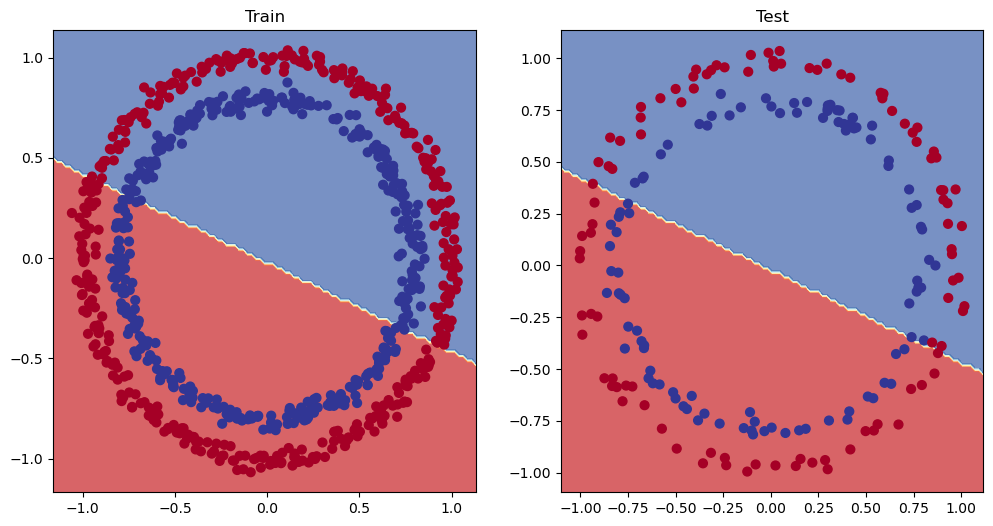

In [19]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 使用非线性方法

由于创建的数据并不是按照线性分布的，因此需要使用非线性的方法进行分类

In [20]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.1)

# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70963, Accuracy: 50.00% | Test Loss: 0.69473, Test Accuracy: 47.00%
Epoch: 100 | Loss: 0.00223, Accuracy: 100.00% | Test Loss: 0.00954, Test Accuracy: 99.50%
Epoch: 200 | Loss: 0.00116, Accuracy: 100.00% | Test Loss: 0.00755, Test Accuracy: 99.50%
Epoch: 300 | Loss: 0.00073, Accuracy: 100.00% | Test Loss: 0.00660, Test Accuracy: 99.50%
Epoch: 400 | Loss: 0.00050, Accuracy: 100.00% | Test Loss: 0.00606, Test Accuracy: 99.50%
Epoch: 500 | Loss: 0.00036, Accuracy: 100.00% | Test Loss: 0.00581, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.00027, Accuracy: 100.00% | Test Loss: 0.00572, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.00021, Accuracy: 100.00% | Test Loss: 0.00604, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.00016, Accuracy: 100.00% | Test Loss: 0.00659, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.00013, Accuracy: 100.00% | Test Loss: 0.00715, Test Accuracy: 99.50%


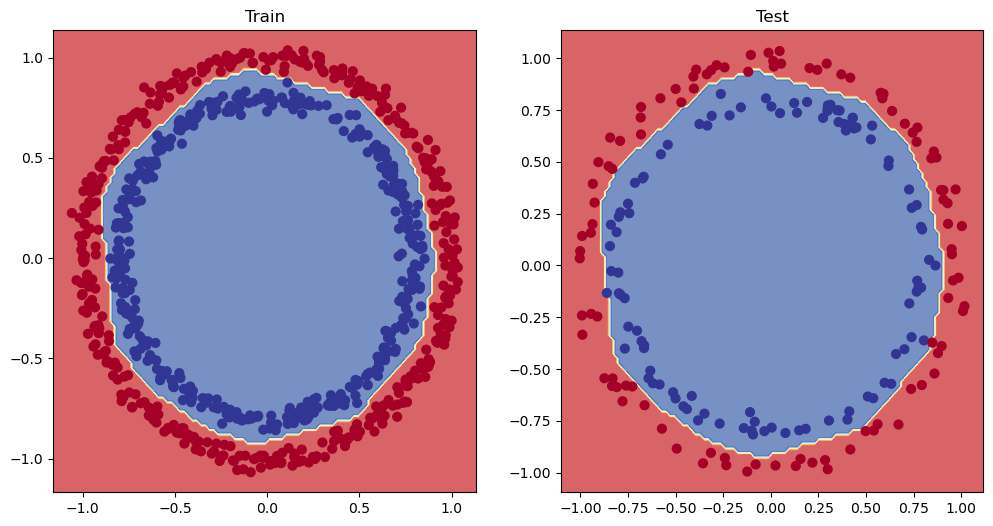

In [23]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

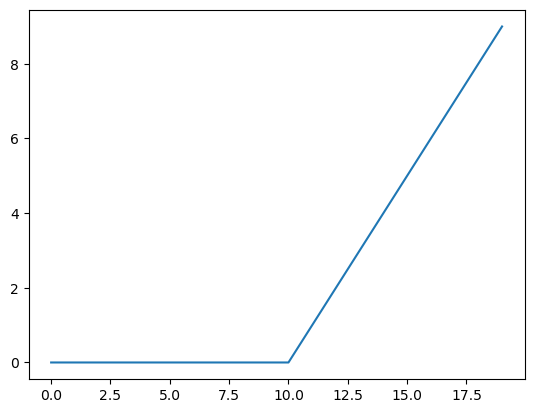

In [25]:
def relu(x):
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

A = torch.arange(-10, 10, 1, dtype=torch.float32)
plt.plot(relu(A))

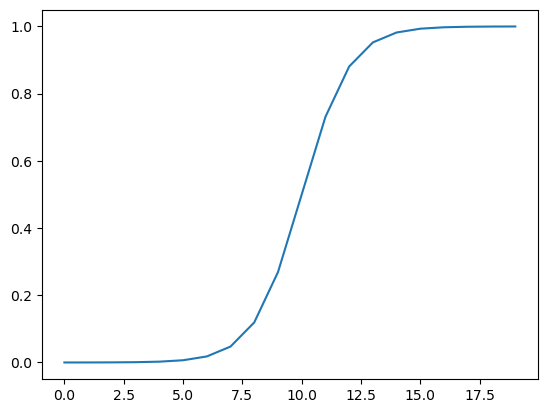

In [26]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))
plt.plot(sigmoid(A))

tensor([[  5.2102,   2.8890],
        [  2.5286,   0.8064],
        [ -5.7221, -11.1529],
        [  5.4796,   3.5943],
        [  1.0601,   4.8093]]) tensor([1, 1, 2, 1, 4])


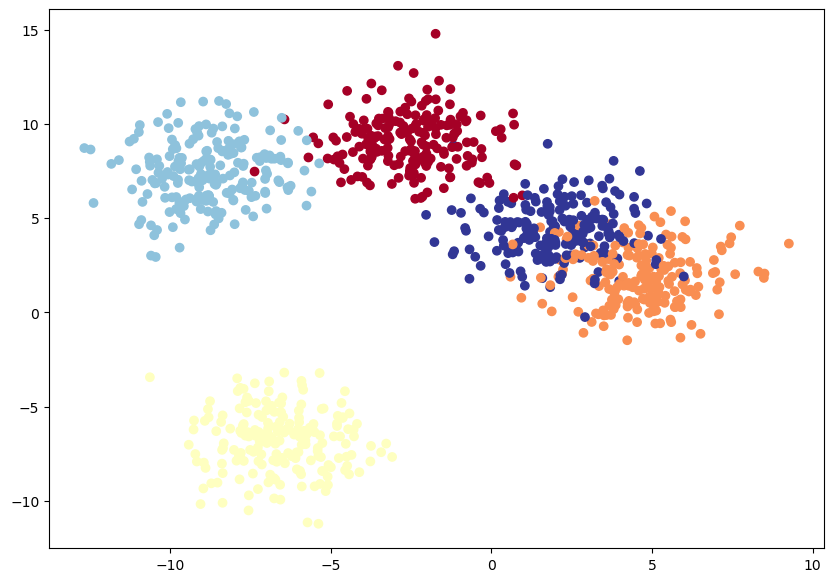

In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary

# 设置数据生成的参数
NUM_CLASSES = 5 
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob,y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,# X features
    centers = NUM_CLASSES, # y labels
    cluster_std=1.5, # 数据的标准差，也就是离散程度
    random_state=RANDOM_SEED
)

# 从naddary变为tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 检查数据
print(X_blob[:5], y_blob[:5])

# 拆分训练、测试数据
X_train,X_test,y_train,y_test = train_test_split(X_blob,y_blob,train_size=0.8,random_state=RANDOM_SEED)

# plot
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)


In [9]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

class BlobModel(nn.Module):
    def __init__(self):
        super().__init__()
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """ 
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=5),
            )
        
    def forward(self, x):
        return self.linear_layer(x)
    
model = BlobModel().to(device)
# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [10]:
loss_fn = nn.CrossEntropyLoss()
op = torch.optim.Adam(params=model.parameters(),
                      lr = 0.1)
epochs = 500

for epoch in range(epochs):
    model.train()

    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1) # 多分类任务使用softmax,然后选取每一行最大值的索引作为分类点

    loss = loss_fn(y_logits,y_train)
    acc  =accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    op.zero_grad()

    loss.backward()

    op.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 


Epoch: 0 | Loss: 1.91212, Acc: 29.00% | Test Loss: 1.35927, Test Acc: 41.50%
Epoch: 10 | Loss: 0.33732, Acc: 91.62% | Test Loss: 0.29486, Test Acc: 92.50%
Epoch: 20 | Loss: 0.20467, Acc: 93.38% | Test Loss: 0.19525, Test Acc: 92.50%
Epoch: 30 | Loss: 0.16772, Acc: 94.75% | Test Loss: 0.15787, Test Acc: 93.00%
Epoch: 40 | Loss: 0.15502, Acc: 94.38% | Test Loss: 0.15908, Test Acc: 92.50%
Epoch: 50 | Loss: 0.15061, Acc: 94.62% | Test Loss: 0.15798, Test Acc: 92.50%
Epoch: 60 | Loss: 0.14736, Acc: 94.88% | Test Loss: 0.16261, Test Acc: 92.50%
Epoch: 70 | Loss: 0.14572, Acc: 94.75% | Test Loss: 0.15939, Test Acc: 92.50%
Epoch: 80 | Loss: 0.14569, Acc: 94.88% | Test Loss: 0.15849, Test Acc: 93.00%
Epoch: 90 | Loss: 0.14669, Acc: 94.38% | Test Loss: 0.16596, Test Acc: 92.50%
Epoch: 100 | Loss: 0.14540, Acc: 94.50% | Test Loss: 0.16320, Test Acc: 93.00%
Epoch: 110 | Loss: 0.14298, Acc: 94.50% | Test Loss: 0.16042, Test Acc: 93.00%
Epoch: 120 | Loss: 0.14206, Acc: 94.75% | Test Loss: 0.16109, T

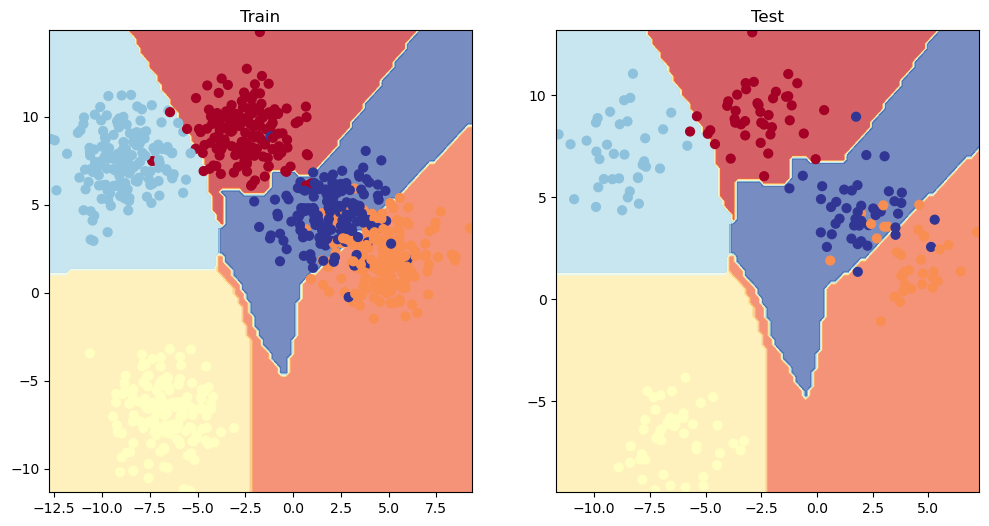

In [13]:
# 注意，因为是二维图形可视化，模型输入特征为3，这样会导致矩阵乘法出错。
# 在这里就修改就行，后面的再另说
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

## 常用的评价指标

| **指标名称/评估方法** | **定义** | **计算公式** |
| --- | --- | --- |
| 准确率 (Accuracy) | 在100个预测中，模型正确预测的数量。 |  $$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$ |
| 精确率 (Precision) | 真正例占预测为正样本的比例。较高的精确率意味着较少的假正例（模型预测为1但实际应为0）。 | $$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$ |
| 召回率 (Recall) | 真正例占真正例与假负例的比例（模型预测为0但实际应为1）。较高的召回率意味着较少的假负例。 |  $$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$ |
| F1评分 (F1-score) | 将精确率和召回率结合成一个指标，1为最佳，0为最差。 |  $$ \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$ |
| 混淆矩阵 (Confusion matrix) | 以表格形式比较预测值与真实值，如果模型100%准确，矩阵的值将沿对角线分布（从左上到右下）。 | - |
| 分类报告 (Classification report) | 包含一些主要的分类指标，如精确率、召回率和F1评分。 | - |


| **预测结果**     | **实际为正**       | **实际为负**       |
|------------------|--------------------|--------------------|
| **预测为正**     | True Positive (TP)  | False Positive (FP) |
| **预测为负**     | False Negative (FN) | True Negative (TN)  |
